In [ ]:

pip install flair

In [128]:
from datetime import datetime
import requests
import pandas as pd
import seaborn as sns


In [61]:
#a token for a log in request with twitter
BEARER_TOKEN = 'AAAAAAAAAAAAAAAAAAAAALxdMQEAAAAAQLauISsmwNTTuOUiyjIY9Snq0JE%3DAM4UuquXRQvENnoZ6MCtSuAZws71IOWzApcPa1kWYInJwsQEJP'

In [76]:
#set parameters such as search query, tweet mode and language
#web request twitter api for tweets and authorize bearer token
params = {'q': 'GME',
            'tweet_mode': 'extended','lang': 'en',
            'count': 500}
response=requests.get('https://api.twitter.com/1.1/search/tweets.json',params=params,
                        headers={'authorization': 'Bearer '+BEARER_TOKEN})

In [ ]:
response.json()

In [78]:
#filter id,tweet and time
def get_data(tweet):
  data = {
      'id': tweet['id_str'],
      'created_at': tweet['created_at'],
      'text': tweet['full_text']
  }
  return data

In [79]:
#apply filter to imported tweets and store in a dataframe
df = pd.DataFrame()
for tweet in response.json()['statuses']:
  row = get_data(tweet)
  df = df.append(row, ignore_index=True)

In [80]:
df.head()

,created_at,id,text
0,Fri Sep 17 02:33:09 +0000 2021,1438692469806354432,If they used to work at Citadel and they’ve mo...
1,Fri Sep 17 02:32:20 +0000 2021,1438692268139966472,"RT @amc_squeeze: We are facing a Tsunami soon,..."
2,Fri Sep 17 02:32:15 +0000 2021,1438692246493319169,@Francesco0996 @jpkuz12 What implications does...
3,Fri Sep 17 02:31:56 +0000 2021,1438692165794910217,"RT @masked_investor: IMO you either add, subtr..."
4,Fri Sep 17 02:31:22 +0000 2021,1438692023201148929,RT @NotSoSuperNFT: $420.69 Gamestop Gift Card ...


In [81]:
tweets = df['text']
txts = tweets.to_list()

In [ ]:
import flair
sentiment_model = flair.models.TextClassifier.load('en-sentiment')

In [82]:
#assigning values and confidence to each texts from tweets with 
#flair library and its textclassifier models
#and store in dictionaries
values = []
confidence = []
for txt in txts:
  sentence = flair.data.Sentence(txt)
  sentiment_model.predict(sentence)
  v = sentence.labels[0].to_dict()['value']
  c = sentence.labels[0].to_dict()['confidence']
  values.append(v)
  confidence.append(c)

In [84]:
#convert dictioinaries to columns and store in dataframe 
df['values'] = values
df['confidence'] = confidence

In [85]:
df.head(5)

,created_at,id,text,values,confidence
0,Fri Sep 17 02:33:09 +0000 2021,1438692469806354432,If they used to work at Citadel and they’ve mo...,NEGATIVE,0.982878
1,Fri Sep 17 02:32:20 +0000 2021,1438692268139966472,"RT @amc_squeeze: We are facing a Tsunami soon,...",NEGATIVE,0.949751
2,Fri Sep 17 02:32:15 +0000 2021,1438692246493319169,@Francesco0996 @jpkuz12 What implications does...,NEGATIVE,0.990071
3,Fri Sep 17 02:31:56 +0000 2021,1438692165794910217,"RT @masked_investor: IMO you either add, subtr...",NEGATIVE,0.831323
4,Fri Sep 17 02:31:22 +0000 2021,1438692023201148929,RT @NotSoSuperNFT: $420.69 Gamestop Gift Card ...,POSITIVE,0.987992


In [86]:
df['values'].count()

100

In [91]:
#categorize into negative and positive 
df.groupby(by='values')['values'].count()

values
NEGATIVE    75
POSITIVE    25
Name: values, dtype: int64

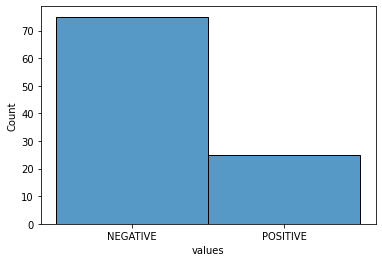

In [150]:
sns.histplot(df['values'])

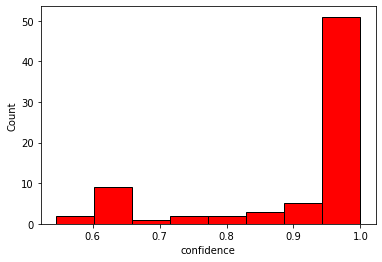

In [162]:
sns.histplot(df[df['values']=='NEGATIVE']['confidence'], facecolor='red')